# Accuracy check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

## Load Predictions

In [2]:
results = pd.read_csv('results/predictions_early_80.csv')
results.head(10)

,id,Headline,target,preds,Reliable,Unreliable
0,8627,Are Whites Being Setup for Genocide?,1,unreliable,0.211613,0.788387
1,7528,Consortiumnews.com,0,reliable,0.999916,0.000085
2,2377,United Methodists Vote Down Israel Divestment ...,0,reliable,0.998583,0.001417
3,4139,Book Notice: Phoenix from the Ashes by H. J. A...,1,reliable,0.880870,0.119130
4,10169,Are Green Smoothies Bad for You?,0,reliable,0.862861,0.137139
5,4793,Supreme Court Hears Church Firing Case,0,reliable,0.999895,0.000105
6,6786,number National Prayer by Anne Graham Lotz,0,reliable,0.693826,0.306174
7,1688,Self-Powered Smart Toys with Nanogenerators Wi...,1,unreliable,0.000031,0.999969
8,5968,Best Food to Prevent Common Childhood Infections,0,reliable,0.909698,0.090302
9,6510,Experiments Prove numberth Spatial Dimension,1,unreliable,0.001795,0.998205


In [3]:
targets = ['reliable', 'unreliable']
targets_dict = dict(zip(targets, range(len(targets))))
targets_dict

{'reliable': 0, 'unreliable': 1}

In [4]:
results['predict'] = list(map(lambda x: targets_dict[x], results['preds']))
results.head(10)

,id,Headline,target,preds,Reliable,Unreliable,predict
0,8627,Are Whites Being Setup for Genocide?,1,unreliable,0.211613,0.788387,1
1,7528,Consortiumnews.com,0,reliable,0.999916,0.000085,0
2,2377,United Methodists Vote Down Israel Divestment ...,0,reliable,0.998583,0.001417,0
3,4139,Book Notice: Phoenix from the Ashes by H. J. A...,1,reliable,0.880870,0.119130,0
4,10169,Are Green Smoothies Bad for You?,0,reliable,0.862861,0.137139,0
5,4793,Supreme Court Hears Church Firing Case,0,reliable,0.999895,0.000105,0
6,6786,number National Prayer by Anne Graham Lotz,0,reliable,0.693826,0.306174,0
7,1688,Self-Powered Smart Toys with Nanogenerators Wi...,1,unreliable,0.000031,0.999969,1
8,5968,Best Food to Prevent Common Childhood Infections,0,reliable,0.909698,0.090302,0
9,6510,Experiments Prove numberth Spatial Dimension,1,unreliable,0.001795,0.998205,1


## Performance Check

In [5]:
y_true = results.target
y_pred = results.predict

In [6]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93      1160
          1       0.93      0.91      0.92      1073

avg / total       0.92      0.92      0.92      2233



## Plot Confusion Matrix

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[1085   75]
 [  98  975]]


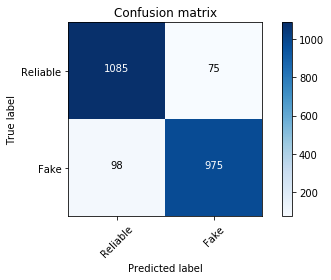

In [8]:
plot_confusion_matrix(confusion_matrix(y_true, y_pred),['Reliable', 'Fake'])

## Prediction distribution visualization

In [21]:
rel = results[results['predict'].astype(str) == '0']['Reliable']
unrel = results[results['predict'].astype(str) == '1']['Reliable']

/opt/Anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


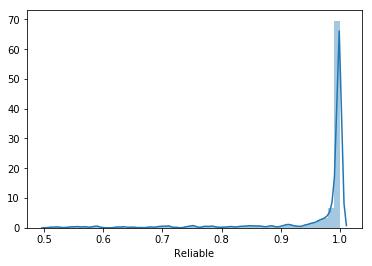

In [22]:
sns.distplot(rel)

/opt/Anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


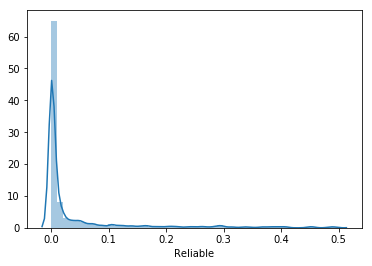

In [23]:
sns.distplot(unrel)